In [2]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.e**-x)

In [3]:
sigmoid(0)

0.5

In [4]:
sigmoid(1.99)

0.8797431375322491

In [5]:
sigmoid(-0.99)

0.27091207765069353

In [6]:
sigmoid(100)

1.0

In [7]:
sigmoid(-100)

3.7200759760208555e-44

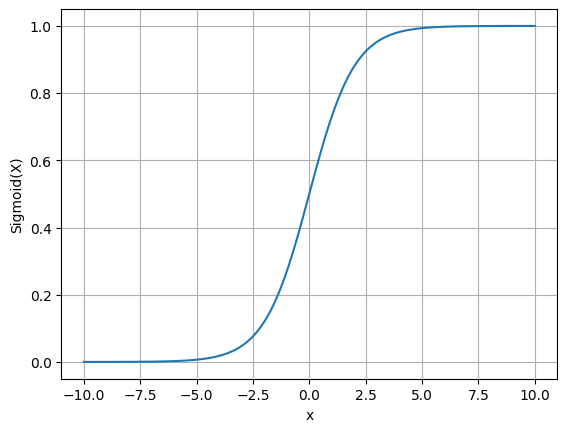

In [9]:
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 100) # 100 equidistant points between -10 and 10
y = sigmoid(z)
plt.plot(z, y)
plt.xlabel("x")
plt.ylabel("Sigmoid(X)")
plt.grid()
plt.show()

In [10]:
# Loss for a single point
def log_loss(y, y_hat):
  loss = -(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
  return loss

In [11]:
log_loss(1, 0.99)

np.float64(0.01005033585350145)

In [13]:
log_loss(1, 0.001)

np.float64(6.907755278982137)

In [14]:
!gdown 1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m

Downloading...
From: https://drive.google.com/uc?id=1uUt7uL-VuF_5cpodYRiriEwhsldeEp3m
To: /content/churn_logistic.csv
100% 494k/494k [00:00<00:00, 8.31MB/s]


In [15]:
import pandas as pd
churn = pd.read_csv("churn_logistic.csv")
churn.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [16]:
churn['Churn'].value_counts()

,count
Churn,
0,2850
1,2850


In [17]:
#Churn prediction in telecom.
import numpy as np
import matplotlib.pyplot as plt

In [18]:
cols = ['Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls', 'Account Length']
y = churn["Churn"]
X = churn[cols]
X.shape

(5700, 5)

In [20]:
from sklearn.model_selection import train_test_split

X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)
X_train.shape

(3420, 5)

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [22]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
model.coef_

array([[0.68445262, 0.29104301, 0.1363756 , 0.79630985, 0.06125924]])

In [24]:
model.intercept_

array([-0.01220319])

In [26]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 1, 1])

In [28]:
model.predict_proba(X_train)[:,0]

array([0.72976668, 0.37778507, 0.3976235 , ..., 0.47270177, 0.34545644,
       0.25779105])

In [29]:
def accuracy(y_true, y_pred):
  return np.sum(y_true==y_pred)/y_true.shape[0]

In [30]:
accuracy(y_train, model.predict(X_train))

np.float64(0.7058479532163743)

In [31]:
accuracy(y_val, model.predict(X_val))

np.float64(0.6982456140350877)

In [33]:
0.99**2

0.9801

In [34]:
-log(0.01)

NameError: name 'ln' is not defined